## An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART & RF and compare the models' performances in train and test sets.

#### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).
#### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest
#### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.
#### 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.
#### 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

### Dataset for Problem 2: insurance_part2_data-1.csv

### Attribute Information:

### 1. Target: Claim Status (Claimed)
### 2. Code of tour firm (Agency_Code)
### 3. Type of tour insurance firms (Type)
### 4. Distribution channel of tour insurance agencies (Channel)
### 5. Name of the tour insurance products (Product)
### 6. Duration of the tour (Duration in days)
### 7. Destination of the tour (Destination)
### 8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
### 9. The commission received for tour insurance firm (Commission is in percentage of sales)
### 10.Age of insured (Age)



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv("/content/insurance_part2_data.csv")

In [6]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


##### There are in all 9 features (independent variables) and the feature Claimed (dependent variable).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


##### There are 3000 entries with integer datatype: (Age, Duration), Object datatipe: (Agency_code, Type, Claimed, Channel, Product_name, Destination) and float datatype: (Commision, sales)

In [8]:
df.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

##### There are no null values.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


### 1. Age:
#### - The average age in the dataset is approximately 38 years.
#### - The age distribution has a standard deviation of 10.46, indicating some variability.
#### - The age range is from 8 to 84 years.




### 2. Commission:
#### - On average, the commission is 14.53, but with a relatively high standard deviation of 25.48, suggesting a wide range of commission values.
#### - The minimum commission is 0, and the maximum is 210.21.
#### - The 25th percentile is 0, indicating that a significant portion of the data has zero or very low commission.




### 3.  Duration:
#### - The average duration is 70.00, but the standard deviation is quite high at 134.05, indicating a wide range of values and potential outliers.
#### - The minimum duration is -1, which might be an anomaly in the data.
#### - The maximum duration is 4580, suggesting a highly skewed distribution.




### 4. Sales:
#### - The average sales amount is 60.25, with a standard deviation of 70.73, indicating variability in sales values.
#### - The minimum sales amount is 0, and the maximum is 539.
#### - The 25th, 50th, and 75th percentiles provide insights into the distribution of sales amounts across the dataset.

In [10]:
df.columns

categorical_features = ["Agency_code","Type","Claimed","Channel","Product Name","Destination"]
for i in df.columns:
    if df[i].dtype == 'object':
        print("feature:", df[i].value_counts(), "\n")


feature: EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64 

feature: Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64 

feature: No     2076
Yes     924
Name: Claimed, dtype: int64 

feature: Online     2954
Offline      46
Name: Channel, dtype: int64 

feature: Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64 

feature: ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64 



#### For respective features:
#### Agency_Code: EPX is the one which is being used by most of the consumers(1365) and least is JZI(239).
#### Type: Travel agencies are being used to book the trips.
#### Claim status: 2076 people in total has claimed for insurance out of 3000 people which is 69.2% of total consumers of the firm.
#### Channel: Primarily Online channel(2954) being used to book the travel.
#### Product name: Among all the kinds of plan 1136 consumers go for customised plan and the least plan being considered is the Gold plan.
#### Destination: The destination for majority of the people is Asia(2465) that is 82.1%  of all yhe consumers.

## Graphical univariate analysis:


In [11]:
# scatter plot with ols trend line, box plot, density plot on int features which will tell us the trend, distribution of data along with the skweness.
# bar plot for categorical features will give us a clear picture of the distribution of respective levels within the features.

In [12]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [13]:
for i in df.columns:
    if df[i].dtype == "int64" or df[i].dtype == "float64":
        fig = px.box(df[i], points = "all", title = i, orientation = "h", color_discrete_sequence = ["green"])
        fig.update_layout(width = 2000, height = 500)
        fig.show()

## Outlier treatment will be required as the features contain a good chunk of outliers.

In [14]:
for i in df.columns:
    if df[i].dtype == "int64" or df[i].dtype == "float64":
        fig =  px.histogram(df, x = i, marginal = 'rug', histnorm = "density",color_discrete_sequence=['green'])
        fig.update_layout(width = 2000, height = 500)
        fig.show()

In [15]:
for i in df.columns:
    if df[i].dtype == "int64" or df[i].dtype == "float64":
        skewness = df[i].skew()
        if skewness > 0:
            print(f"The skewness in {i}: {skewness}  shows Positive skewness (right-skewed) means the tail of the distribution is longer on the positive side of the peak than on the negative side, with a concentration of data on the left and a long tail to the right.")
print("\n","- Out of all Duration feature is heavily skewed on the right side. Though there is some skewness in Age feature, still ")


The skewness in Age: 1.149712770495169  shows Positive skewness (right-skewed) means the tail of the distribution is longer on the positive side of the peak than on the negative side, with a concentration of data on the left and a long tail to the right.
The skewness in Commision: 3.148857772356885  shows Positive skewness (right-skewed) means the tail of the distribution is longer on the positive side of the peak than on the negative side, with a concentration of data on the left and a long tail to the right.
The skewness in Duration: 13.784681027519602  shows Positive skewness (right-skewed) means the tail of the distribution is longer on the positive side of the peak than on the negative side, with a concentration of data on the left and a long tail to the right.
The skewness in Sales: 2.381148461687274  shows Positive skewness (right-skewed) means the tail of the distribution is longer on the positive side of the peak than on the negative side, with a concentration of data on the l

In [16]:
df.columns


Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

# BIVARIATE ANALYSIS

#### 1. Age vs Commission - will give us a peak into the trend with respect to age and commission as in, with the increase in age leads to high commission.
#### 2. Commission vs Sales - will increase in commission lead to increase in sales.
#### 3. Age vs Duration - which age group goes for longer duration of the tour.
#### 4. Commission vs Duration  - Does longer duration tour gives high commission
#### 5. Duration vs sales - does longer duration tour cause higher sales of the insurance policy.
#### 6. Age vs sales - which age group gives high insurance policy sale.
####

In [17]:
df['Sales'] = df['Sales']*100
df['Commision'] = ((df['Sales']/100)* df['Commision'])

In [18]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,1.757,Online,7,251.0,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.000,Online,34,2000.0,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,58.806,Online,3,990.0,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.000,Online,4,2600.0,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,113.400,Online,53,1800.0,Bronze Plan,ASIA


In [19]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,1.757,Online,7,251.0,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.000,Online,34,2000.0,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,58.806,Online,3,990.0,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.000,Online,4,2600.0,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,113.400,Online,53,1800.0,Bronze Plan,ASIA


In [20]:
for i in df.columns:
    if i != "Age" and (df[i].dtype =="int64" or df[i].dtype=="float64"):
        fig = px.histogram(df, x = 'Age', y = df[i], color_discrete_sequence = ['green'])
        fig.show()

#### In age group 30-50 the insurance firm makes most of the sales moreover, age 31 gives the maximum commsion.
#### From the histogram plot between duration sum and age along with sales sum with age shows that people with age 36 are the ones with highest travel duration

In [21]:
fig = px.scatter(df, x = 'Sales', y = 'Commision', trendline = "ols", trendline_color_override = "red", color_discrete_sequence =  ['green'])
fig.show()

#### From the above plot we can conculde that approx 68% of variability in comission can be explained by sales. Moreover, with increase in sale there is increase in comission as well!

In [22]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,1.757,Online,7,251.0,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.000,Online,34,2000.0,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,58.806,Online,3,990.0,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.000,Online,4,2600.0,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,113.400,Online,53,1800.0,Bronze Plan,ASIA


In [23]:
### Claimed status per Agency_code, Type,Channel, Product_name, Destination


for i in df:
    if i != 'Claimed' and df[i].dtype == "object":
        fig = px.bar(df,x = df[i], facet_col = "Claimed", color = i)
        fig.show()

#### 1. Ones who takes Insurance from Agency "EPX" claimes for the insurance the least and "C2B" the most out of all the agencies. Moreover, 'C2B' agency is leading to more claims than any other agency.
#### 2. Very few are claiming for insurance under travel agency. There is not much of the difference between the people claiming and not claiming for insurance under Airline agency type.
#### 3. People opting for gold and silver plan are claiming more than any other plan type comparatively.
#### 4. Out of all the Destinations people opting for Asia as the destination are claiming more however the percentage of claim in Asia isnt high as comapred to any other destination.

In [24]:
result = df.groupby(['Agency_Code', 'Claimed']).size().unstack()
result['Total'] = result['Yes'] + result['No']
result['Percentage_Yes']= round((result['Yes'] / result['Total'])*100,2)
result['Percentage_No'] = round((result['No'] / result['Total'])*100,2)

print(result)

Claimed        No  Yes  Total  Percentage_Yes  Percentage_No
Agency_Code                                                 
C2B           364  560    924           60.61          39.39
CWT           331  141    472           29.87          70.13
EPX          1172  193   1365           14.14          85.86
JZI           209   30    239           12.55          87.45


#####  - It is evident that C2B agency code is contributing the most in claiming and JZI the least. Thus, C2B ageny to be prompted on the status in order to analyse the reason behind. Though most of the people opt for EPX agency and claiming percent is less thus can say the most reliable agnecies are EPX and JZI.

In [25]:
result = df.groupby(['Type', 'Claimed']).size().unstack()
result['Total'] = result['Yes'] + result['No']
result['Percentage_Yes'] = round((result['Yes'] / result['Total'])*100,2)
result['Percentage_No'] = round((result['No'] / result['Total'])*100,2)

print(result)

Claimed          No  Yes  Total  Percentage_Yes  Percentage_No
Type                                                          
Airlines        573  590   1163           50.73          49.27
Travel Agency  1503  334   1837           18.18          81.82


##### - There is no significant difference in Airline type for claiming and not claiming. However, Travel agency type doesnt contribute much in claiming insurance. Can conclude that half of the totalpopulation opting for airline type are claiming thus, the agency to be prompted on the trend can be seen and asked to analyse the reason behind.

In [26]:
result = df.groupby(['Channel', 'Claimed']).size().unstack()
result['Total'] = result['Yes'] + result['No']
result['Percentage_Yes'] = round((result['Yes'] / result['Total'])*100,2)
result['Percentage_No'] = round((result['No'] / result['Total'])*100,2)

print(result)

Claimed    No  Yes  Total  Percentage_Yes  Percentage_No
Channel                                                 
Offline    29   17     46           36.96          63.04
Online   2047  907   2954           30.70          69.30


##### - Mostly people opt for Online channel however, there is not much of the difference between the claim status between the two channels still offline has higher percentage.

In [27]:
result = df.groupby(["Product Name", 'Claimed']).size().unstack()
result['Total'] = result['Yes'] + result['No']
result['Percentage_Yes'] = round((result['Yes'] / result['Total'])*100,2)
result['Percentage_No'] = round((result['No'] / result['Total'])*100,2)

print(result)

Claimed             No  Yes  Total  Percentage_Yes  Percentage_No
Product Name                                                     
Bronze Plan        399  251    650           38.62          61.38
Cancellation Plan  635   43    678            6.34          93.66
Customised Plan    882  254   1136           22.36          77.64
Gold Plan           39   70    109           64.22          35.78
Silver Plan        121  306    427           71.66          28.34


##### - Most of the people opt for Customised plan, however, the least claiming percentage is for cancellatio plan and highest in gold, silver plan.

In [28]:
result = df.groupby(['Destination', 'Claimed']).size().unstack()
result['Total'] = result['Yes'] + result['No']
result['Percentage_Yes'] = round((result['Yes'] / result['Total'])*100,2)
result['Percentage_No'] = round((result['No'] / result['Total'])*100,2)

print(result)

Claimed        No  Yes  Total  Percentage_Yes  Percentage_No
Destination                                                 
ASIA         1691  774   2465           31.40          68.60
Americas      232   88    320           27.50          72.50
EUROPE        153   62    215           28.84          71.16


##### - There is no prominent difference in claiming percentage between the three destinations however, the most famous destination is ASIA with highest claiming percentage comapratively

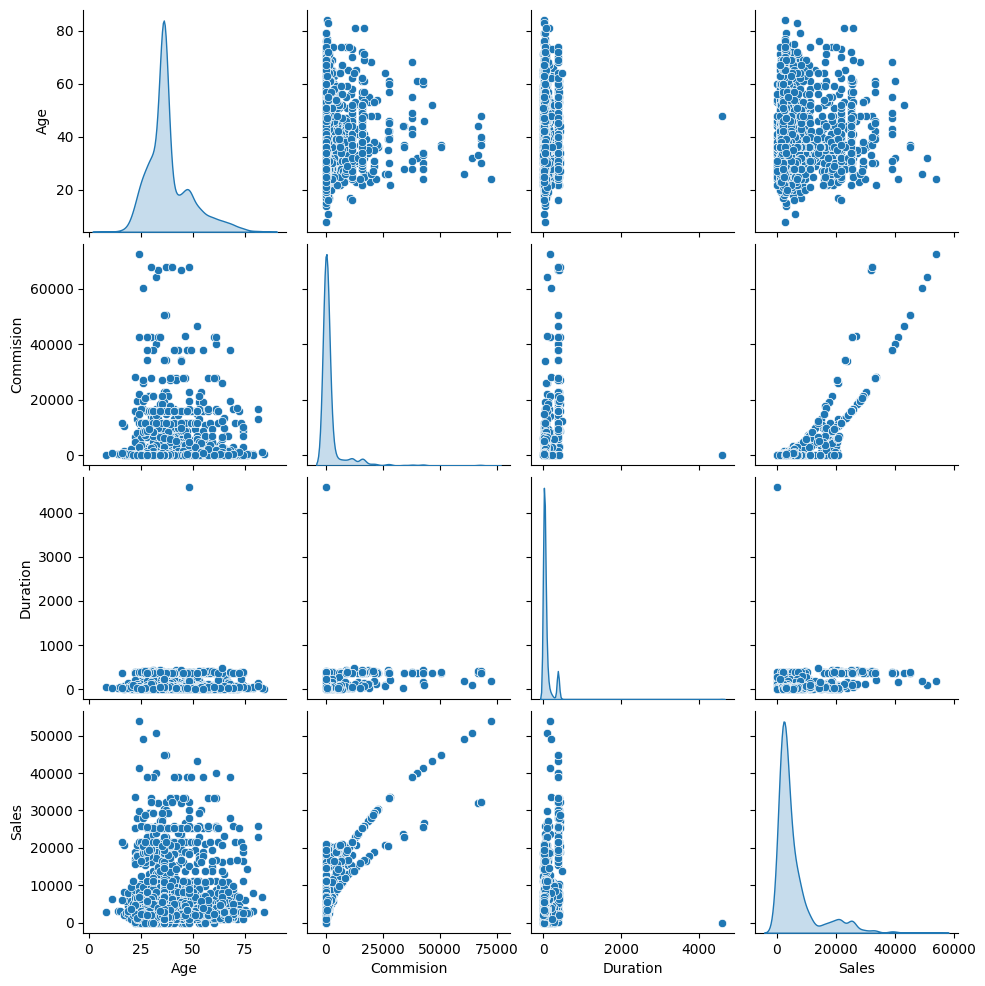

In [29]:
sns.pairplot(df, diag_kind = 'kde')

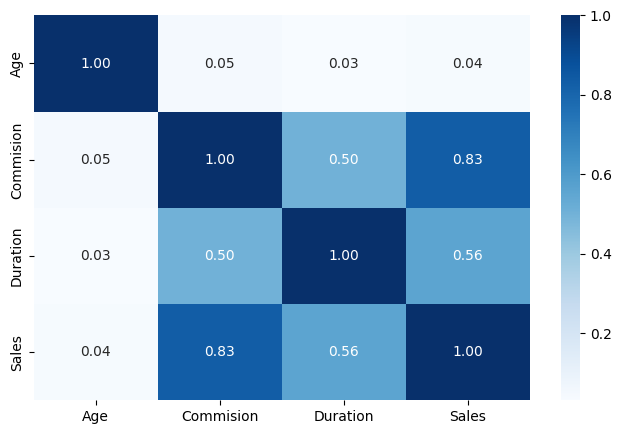

In [30]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt='.2f')
plt.show()

##### - From the above pairplot and heatmap it can be concluded that there is no significant relation between any of the independent variables(numerical) other than sales and commision(positive relation).

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
 label_encoder = LabelEncoder()

In [33]:
categ = df.select_dtypes(include=['object']).columns

In [34]:
categ

Index(['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name',
       'Destination'],
      dtype='object')

In [35]:
for i in categ:
    df[i] = label_encoder.fit_transform(df[i])

Training Accuracy: 0.9941666666666666
Testing Accuracy: 0.6983333333333334

Confusion Matrix:
 [[321  95]
 [ 86  98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       416
           1       0.51      0.53      0.52       184

    accuracy                           0.70       600
   macro avg       0.65      0.65      0.65       600
weighted avg       0.70      0.70      0.70       600


ROC-AUC Score: 0.6525331835284282


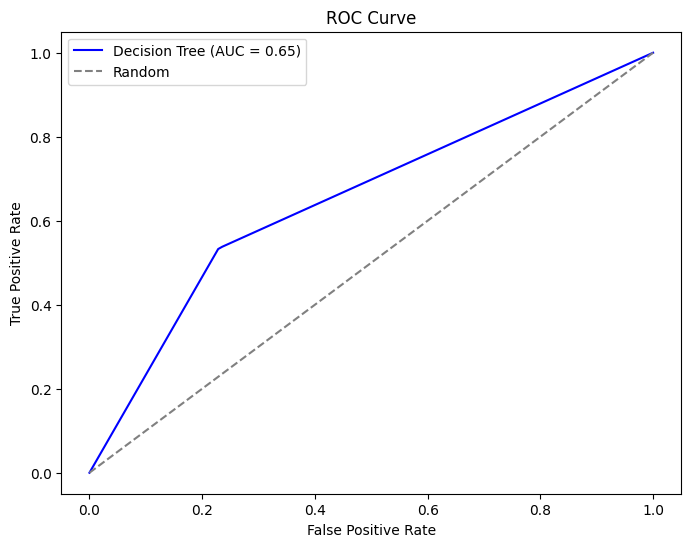

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'Claimed' is your target variable
X = df.drop('Claimed', axis=1)
y = df['Claimed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Evaluate the performance of the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report)

# ROC-AUC Score and Curve
y_test_proba = dt_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)
print("\nROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training Accuracy: 0.7970833333333334
Testing Accuracy: 0.765

Confusion Matrix:
 [[354  62]
 [ 79 105]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       416
           1       0.63      0.57      0.60       184

    accuracy                           0.77       600
   macro avg       0.72      0.71      0.72       600
weighted avg       0.76      0.77      0.76       600


ROC-AUC Score: 0.7893956417224081


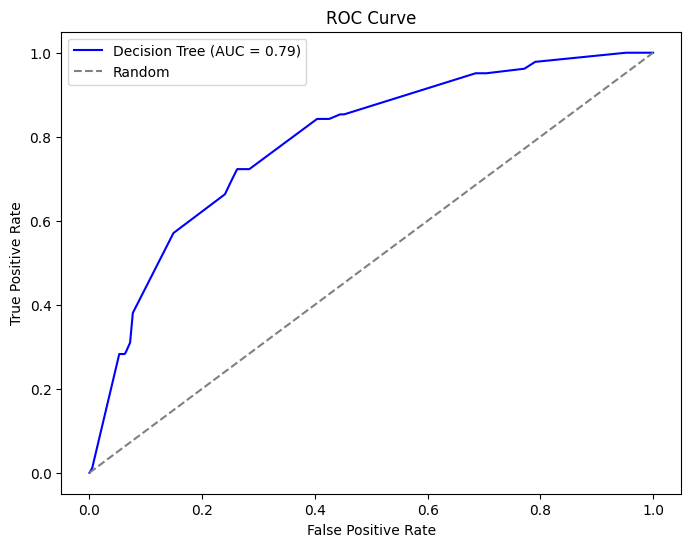

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_dt_model = grid_search.best_estimator_

# Make predictions on the training and testing sets
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

# Evaluate the performance of the model
print("Best Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report)

# ROC-AUC Score and Curve
y_test_proba = best_dt_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)
print("\nROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [38]:

pip install xgboost

Training Accuracy: 0.9354166666666667
Testing Accuracy: 0.7583333333333333

Confusion Matrix:
 [[358  57]
 [ 88  97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       415
           1       0.63      0.52      0.57       185

    accuracy                           0.76       600
   macro avg       0.72      0.69      0.70       600
weighted avg       0.75      0.76      0.75       600


ROC-AUC Score: 0.7678866818625855


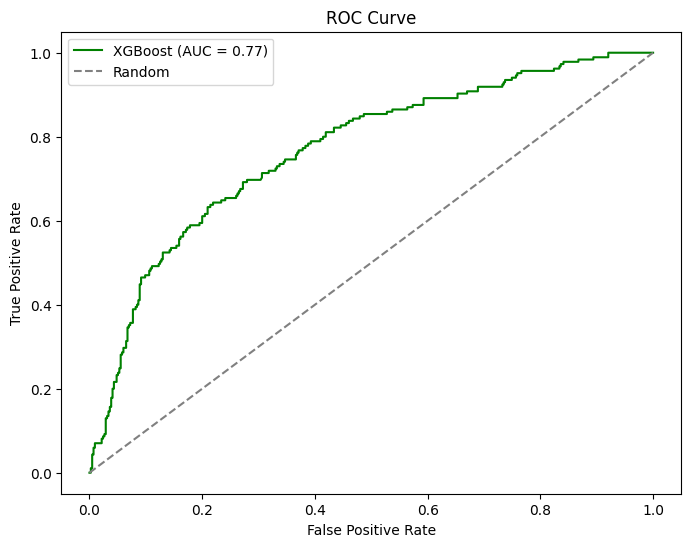

In [39]:


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  # Add this import
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'Claimed' is your target variable
X = df.drop('Claimed', axis=1)
y = df['Claimed']

# Use LabelEncoder to encode categorical variables
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create an XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluate the performance of the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report)

# ROC-AUC Score and Curve
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)
print("\nROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Accuracy: 0.80875
Testing Accuracy: 0.7883333333333333

Confusion Matrix:
 [[374  41]
 [ 86  99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       415
           1       0.71      0.54      0.61       185

    accuracy                           0.79       600
   macro avg       0.76      0.72      0.73       600
weighted avg       0.78      0.79      0.78       600


ROC-AUC Score: 0.8219863236730707


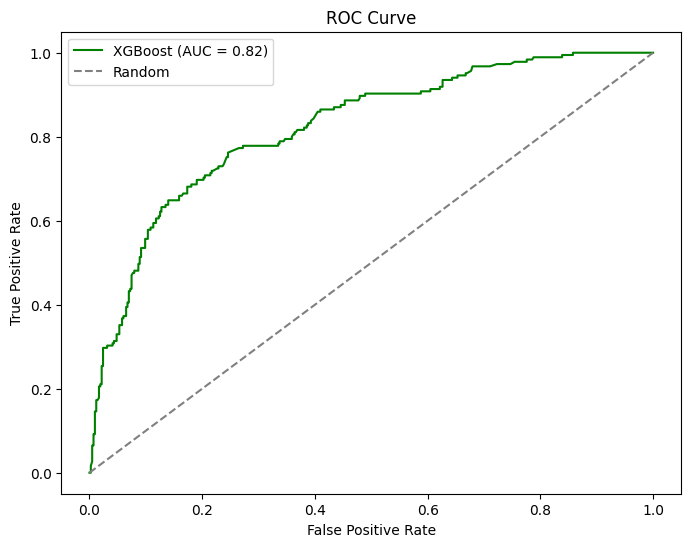

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'Claimed' is your target variable
X = df.drop('Claimed', axis=1)
y = df['Claimed']

# Use LabelEncoder to encode categorical variables
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create an XGBoost model with hyperparameter tuning
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,  # If you encounter a warning about deprecated label encoder
    random_state=42,
    n_jobs=-1  # Utilize all available cores
)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Make predictions on the training and testing sets
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Evaluate the performance of the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report)

# ROC-AUC Score and Curve
y_test_proba = best_xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)
print("\nROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


 Recall is a measure of the ability of a classification model to capture and correctly identify the positive instances. Higher recall indicates that the model is better at identifying true positives among all actual positives.

 - Bsed on the recall values:

 - XGBoost Model has the highest recall (0.69).
 - Random Forest Model also has a high recall (0.68).
 - Decision Tree Model (Tuned) has improved recall compared to the default decision tree model (0.57).

Therefore, for prioritizing recall, may choose either the XGBoost Model or the Random Forest Model as both demonstrate good recall values.